# Number four

In [7]:
#Importing all the neccessary libraries
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy as sci
from empiricaldist import Pmf
from scipy.stats import norm
import statsmodels.formula.api as smf
from scipy import linspace,polyfit,sqrt,stats,polyval,randn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [8]:
#Compounded quarterly compute the balance after 7 years
p = 2100 #principle
r = 0.034 #rate
n = 4 #quqrters in a year
t = 7 #number of years

In [9]:
#Compounded quarterly and the balance after 7 years
v = p*(1+r/n)**(n*t)
v

2661.6108980682593

In [10]:
#iNTEREST IS COMPOUNDED TWICE USING THE SAME PRICINCIPLE AND INTEREST AS ABOVE
p = 2100 #principle
r = 0.034 #rate
n = 2 # COMPOUNDED TWICE
t = 7 #number of years
v2 = p*(1+r/n)**(n*t)
v2

2658.965091277534

In [11]:
#Interesty is compounded continuously 
V = p**(r*t)
V

6.175728457877729

# NUMBER FIVE

In [51]:
taxi = pd.read_csv("data/taxi.csv")
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [21]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [22]:
#Choosing variables to work with in the simple linearregression
y = taxi.passenger_count
y

0      3
1      6
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    2
199    5
Name: passenger_count, Length: 200, dtype: int64

In [23]:
#Choosing the second variable
x = taxi.total_amount
x

0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

In [26]:
# Creating A simple linear regression from the abovce variables
results = smf.ols("y ~ x", data=taxi).fit()
results.params

Intercept    1.636813
x           -0.003811
dtype: float64

#### The above expression means that
 Passenger_count = 1.636813 - 0.003811 total_amount
where Passenger_count is the percentage of change and the 0.003811 being the results
This is called a simple linear regression with one parameter
The expression in words is a percentage change in Passenger_counts results into 0.003811 total_amount leaving everything else as a constant
This means that we have regressed passenger_counts(y) as a function of total_amount(x) and the actual computation is done by the fit method as the ols represents the model

In [27]:
# MULTIPLE LINEAR REGRESSION
#MORE VARIABLES FOR THE MULTIPLE LINEAR REGRESSION
z = taxi.trip_distance
z

0      2.02
1      1.59
2      1.69
3      0.90
4      4.79
       ... 
195    1.18
196    2.30
197    0.83
198    1.12
199    2.41
Name: trip_distance, Length: 200, dtype: float64

In [29]:
#SECOND VARIABLE
w = taxi.fare_amount
w

0      12.0
1      10.0
2       8.5
3       4.5
4      19.5
       ... 
195    10.0
196     9.5
197     5.0
198     7.0
199    10.5
Name: fare_amount, Length: 200, dtype: float64

In [30]:
#MULTIPLE LINEAR REGRESSION
results = smf.ols("y ~ x +z + w ", data=taxi).fit()
results.params

Intercept    1.779794
x           -0.045927
z            0.043300
w            0.035341
dtype: float64

the constants are assumed to be there and left constant one unit of y(passenger_count) results to something keeping all the others constant ie y = 1.779794 - 0.045927 total_amount + 0.043300trip_distance +0.035341 fare_amount.

# Number TWO

In [50]:
df = pd.read_csv("data/taxi.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,7/15/2019 16:27,7/15/2019 16:44,3,2.02,1,N,186,233,1,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2,7/17/2019 20:26,7/17/2019 20:40,6,1.59,1,N,141,161,2,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2,7/6/2019 16:01,7/6/2019 16:10,1,1.69,1,N,246,249,2,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1,7/18/2019 22:32,7/18/2019 22:35,1,0.90,1,N,229,141,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2,7/19/2019 14:54,7/19/2019 15:19,1,4.79,1,N,237,107,1,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1/18/2019 8:42,1/18/2019 8:56,1,1.18,1,N,43,237,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1,1/19/2019 4:34,1/19/2019 4:43,1,2.30,1,N,148,234,1,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2,1/5/2019 10:37,1/5/2019 10:42,1,0.83,1,N,237,263,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2,1/23/2019 10:36,1/23/2019 10:44,2,1.12,1,N,144,113,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [32]:
# CDF OF THE TOTAL AMOUNT VARIABLE
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [33]:
#Extractint the total_amount values
total_amount = df.total_amount
total_amount

0      20.38
1      13.80
2      11.80
3       9.95
4      28.50
       ...  
195    12.96
196    12.95
197     6.96
198     7.80
199    12.30
Name: total_amount, Length: 200, dtype: float64

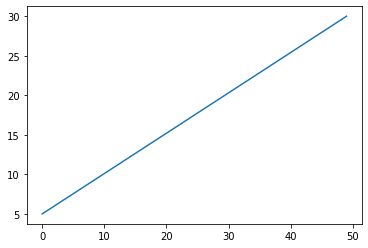

In [59]:
#investigatoing wjether it follows a normal distribution
plt.plot(total_amount);

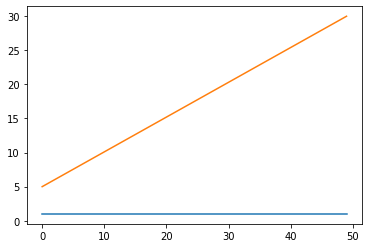

In [57]:
#CDF OF THE TOTAL_AMOUNT
total_amount= np.linspace(5,30)# range of the total_amount is within 5-30
m = norm(0,1).cdf(total_amount)# norm with the 0 mean since its not yet computed and the standard deviation of 1 and the cdf of the total_amount
plt.plot(m);
plt.plot(total_amount);


### According to the appearnce odff the line the total_amount variable is in a normal distribution 

In [38]:
#MEAN
total_amount.mean()

17.5

In [39]:
#STANDARD DEVIATION
total_amount.std()

7.362688617174395

In [40]:

_array = np.linspace(5,30)
_array

array([ 5.        ,  5.51020408,  6.02040816,  6.53061224,  7.04081633,
        7.55102041,  8.06122449,  8.57142857,  9.08163265,  9.59183673,
       10.10204082, 10.6122449 , 11.12244898, 11.63265306, 12.14285714,
       12.65306122, 13.16326531, 13.67346939, 14.18367347, 14.69387755,
       15.20408163, 15.71428571, 16.2244898 , 16.73469388, 17.24489796,
       17.75510204, 18.26530612, 18.7755102 , 19.28571429, 19.79591837,
       20.30612245, 20.81632653, 21.32653061, 21.83673469, 22.34693878,
       22.85714286, 23.36734694, 23.87755102, 24.3877551 , 24.89795918,
       25.40816327, 25.91836735, 26.42857143, 26.93877551, 27.44897959,
       27.95918367, 28.46938776, 28.97959184, 29.48979592, 30.        ])

In [43]:
#normal distribution with the smae  nmean and std  of continuous variables  and compute the cdf of each value in the array
_norm = norm(18,7).cdf(_array)
_norm


array([0.03164542, 0.03719099, 0.04350639, 0.05066039, 0.05872142,
       0.06775638, 0.07782931, 0.08899998, 0.10132241, 0.11484337,
       0.12960087, 0.14562268, 0.162925  , 0.18151121, 0.20137086,
       0.2224788 , 0.24479468, 0.26826269, 0.29281159, 0.31835519,
       0.34479302, 0.37201147, 0.39988518, 0.42827876, 0.45704873,
       0.48604568, 0.51511664, 0.54410744, 0.57286519, 0.60124068,
       0.62909072, 0.65628028, 0.68268444, 0.70819008, 0.73269731,
       0.7561205 , 0.77838903, 0.79944771, 0.8192568 , 0.83779177,
       0.85504271, 0.87101356, 0.88572099, 0.89919322, 0.91146863,
       0.92259431, 0.93262454, 0.94161928, 0.94964273, 0.95676187])

Text(0.5, 1.0, 'THE NORMAL CDF WITH A GRAY LINE')

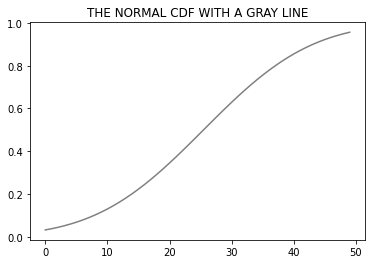

In [47]:
#Plot thye normal cdf with a gray line
plt.plot(_norm,color="gray");
plt.title("THE NORMAL CDF WITH A GRAY LINE")

In [83]:
#CDF
cdf_total_amount = Cdf.from_seq(total_amount)
cdf_total_amount

,probs
5.000000,0.02
5.510204,0.04
6.020408,0.06
6.530612,0.08
7.040816,0.10
7.551020,0.12
8.061224,0.14
8.571429,0.16
9.081633,0.18
9.591837,0.20


In [82]:
from empiricaldist import Cdf

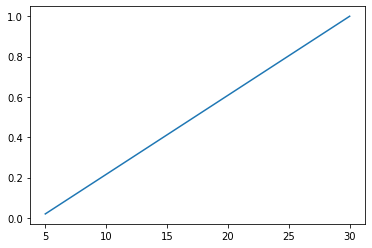

In [85]:
cdf_total_amount.plot();

# NUMBER ONE

In [49]:
exam = pd.read_csv("data/exam1.csv")
exam

,Country Code,TableName,IncomeGroup,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Main Leader Gender,Any Leader Gender,Avg Temp,Normalized Cases,Normalized Deaths
0,AFG,Afghanistan,Low income,56.937760,39192,1453,3.707389,38041754,1.910135e+10,2293.551684,M,M,12.60,0.001030,3.820000e-05
1,AGO,Angola,Lower middle income,24.713052,4672,171,3.660103,31825295,9.463542e+10,6929.678158,M,M,21.55,0.000147,5.370000e-06
2,ALB,Albania,Upper middle income,104.612263,13153,375,2.851061,2854191,1.527808e+10,14495.078510,M,M,11.40,0.004608,1.313860e-04
3,AND,Andorra,High income,163.842553,1836,53,2.886710,77142,3.154058e+09,NaN,M,M,7.60,0.023800,6.870450e-04
4,ARE,United Arab Emirates,High income,135.609110,90618,411,0.453552,9770529,4.211420e+11,69900.877850,M,M,27.00,0.009275,4.210000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,VNM,Vietnam,Lower middle income,308.125246,1069,35,3.274088,96462106,2.619210e+11,8374.444328,M,M,24.45,0.000011,3.630000e-07
178,YEM,"Yemen, Rep.",Low income,53.977853,2030,587,28.916256,29161922,NaN,NaN,M,M,23.85,0.000070,2.010000e-05
179,ZAF,South Africa,Upper middle income,47.630120,669498,16376,2.446012,58558270,3.514320e+11,12999.120260,M,M,17.75,0.011433,2.796530e-04
180,ZMB,Zambia,Lower middle income,23.341479,14612,332,2.272105,17861030,2.306472e+10,3623.699395,M,M,21.40,0.000818,1.860000e-05


In [52]:
exam.columns

Index(['Country Code', 'TableName', 'IncomeGroup', 'PopDensity_2018',
       'Confirmed Cases', 'Deaths', 'Mortality Rate', 'Population_2019',
       'GDP_2019', 'GDP_per_cap_2019', 'Main Leader Gender',
       'Any Leader Gender', 'Avg Temp', 'Normalized Cases',
       'Normalized Deaths'],
      dtype='object')

In [54]:
# visualisation of any two variables of my choice
confirmed_cases = exam.loc[:,"Confirmed Cases"]
confirmed_cases

0       39192
1        4672
2       13153
3        1836
4       90618
        ...  
177      1069
178      2030
179    669498
180     14612
181      7803
Name: Confirmed Cases, Length: 182, dtype: int64

In [56]:
deaths = exam.loc[:,"Deaths"]
deaths

0       1453
1        171
2        375
3         53
4        411
       ...  
177       35
178      587
179    16376
180      332
181      227
Name: Deaths, Length: 182, dtype: int64

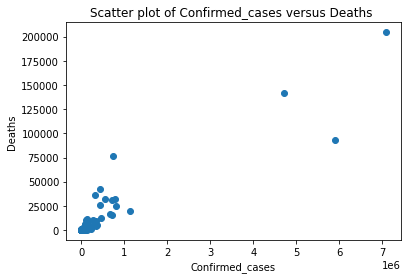

In [60]:
plt.plot(confirmed_cases, deaths, 'o');

plt.xlabel('Confirmed_cases')
plt.ylabel('Deaths')
plt.title('Scatter plot of Confirmed_cases versus Deaths ');

# relationship
The higher the confirmed cases the higher the death rate and the lower the confirmed cases the lower the death rate
where there  are no cases at all, there is no death registered
countries with high cases have the highest death rate forexample where the confirmed cases at 7, the death rate is at its peak(200,000)

In [61]:
#descriptive statistics
exam.describe()

,PopDensity_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Avg Temp,Normalized Cases,Normalized Deaths
count,178.000000,1.820000e+02,182.000000,182.000000,1.820000e+02,1.690000e+02,168.000000,179.000000,182.000000,182.000000
mean,209.578681,1.798681e+05,5453.186813,2.552053,4.176762e+07,5.037484e+11,22175.663497,18.511117,0.005142,0.000126
std,642.276577,7.728216e+05,21079.533796,2.807438,1.494774e+08,2.060972e+12,22028.464791,8.179984,0.007289,0.000208
min,2.040609,1.900000e+01,0.000000,0.000000,3.386000e+04,4.290166e+08,782.816589,-5.100000,0.000003,0.000000
25%,37.143092,2.930250e+03,50.000000,1.063698,2.689939e+06,1.282700e+10,5398.131919,10.625000,0.000540,0.000008
50%,83.949492,1.337950e+04,228.000000,2.004451,9.758033e+06,4.731962e+10,14747.947505,21.850000,0.002313,0.000038
75%,204.487818,7.642675e+04,1450.000000,3.071983,3.040490e+07,2.619210e+11,32413.601215,25.325000,0.006527,0.000135
max,7952.998418,7.078039e+06,204486.000000,28.916256,1.397715e+09,2.137440e+13,121292.739300,28.290000,0.044084,0.001240


In [62]:
#REgression analysis
dependent = exam.loc[:,"Confirmed Cases"]
dependent

0       39192
1        4672
2       13153
3        1836
4       90618
        ...  
177      1069
178      2030
179    669498
180     14612
181      7803
Name: Confirmed Cases, Length: 182, dtype: int64

In [63]:
independent = exam.loc[:,"IncomeGroup"]
independent

0               Low income
1      Lower middle income
2      Upper middle income
3              High income
4              High income
              ...         
177    Lower middle income
178             Low income
179    Upper middle income
180    Lower middle income
181    Lower middle income
Name: IncomeGroup, Length: 182, dtype: object

In [64]:
independent_2 = exam.loc[:,"GDP_per_cap_2019"]
independent_2

0       2293.551684
1       6929.678158
2      14495.078510
3               NaN
4      69900.877850
           ...     
177     8374.444328
178             NaN
179    12999.120260
180     3623.699395
181     2953.484113
Name: GDP_per_cap_2019, Length: 182, dtype: float64

In [65]:
independent_3 = exam.loc[:,"GDP_2019"]
independent_3 

0      1.910135e+10
1      9.463542e+10
2      1.527808e+10
3      3.154058e+09
4      4.211420e+11
           ...     
177    2.619210e+11
178             NaN
179    3.514320e+11
180    2.306472e+10
181    2.144076e+10
Name: GDP_2019, Length: 182, dtype: float64

In [67]:
# simple Linear Regression
results = smf.ols("dependent ~ independent", data=exam).fit()
results.params

Intercept                             208046.711864
independent[T.Low income]            -199351.390436
independent[T.Lower middle income]    -31217.798821
independent[T.Upper middle income]     38558.247319
dtype: float64

According to the above the percentasge increase in income groups led to the increase in covid cases confirmed
therefore people/countries with more incomes are more likely to register higher covid cases

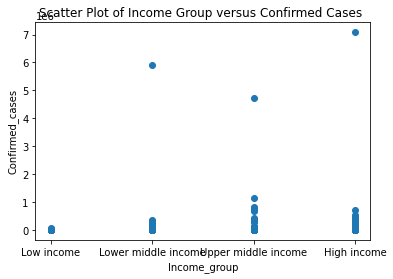

In [71]:
#Visualising the reghression between independent and the dependent
plt.plot(independent, dependent, 'o');
plt.xlabel('Income_group')
plt.ylabel('Confirmed_cases')
plt.title('Scatter Plot of Income Group versus Confirmed Cases ');


# explanation
countries with high incomes experienced more cases propabably because there were alot economic activities taking place that lked to masses being one place hence the increase in number

Countries with  upper_middle incomes experienced slightly higher cases but less than the the ones with high income
 countries with Lower middle incomes experienced more cases band at some point higher than the upper middle incomes because of the habit of sharing and going to cheap happening places that oleave no room for social distance
 
 probably the countries with low income experienced less cases because their main activity is  agriculture where they are limited in number and have very few social gatherings and actually these people eat healthier food than the rich ones



In [72]:
results = smf.ols("dependent ~ independent_2", data=exam).fit()
results.params

Intercept        121824.230255
independent_2         3.139160
dtype: float64

a percentage change in the confirmed cases  is due to 3.139160 gdp_per_cap_2019
y = 121824confirmedcases. + 3.139160gdp_per_cap_+2019

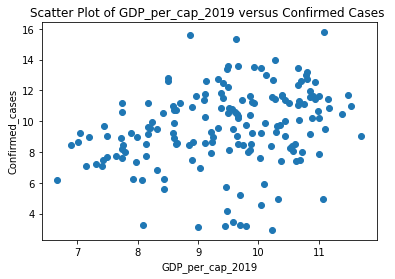

In [73]:
#VISUALISATION OF THE ABOVE
x =np.log(independent_2)
y = np.log(dependent)
plt.plot(x, y, 'o');
plt.xlabel('GDP_per_cap_2019')
plt.ylabel('Confirmed_cases')
plt.title('Scatter Plot of GDP_per_cap_2019 versus Confirmed Cases ');


The higher the GDP-Per_cap_2019 the higher the confirmed cases
therefore countries with high Gdp_per_cap2019 experienced more covid cases because some of these countries have a high population and attract more immigrants than the ones with a low one

In [76]:
results = smf.ols("dependent ~ independent_3", data=exam).fit()
results.params

Intercept        6.731145e+04
independent_3    2.441771e-07
dtype: float64

There is a positive change between the gdp_2019 and tyhe confirmed cases
a posityive change in percentage in the cases in due to 2.441771 GDP_2019

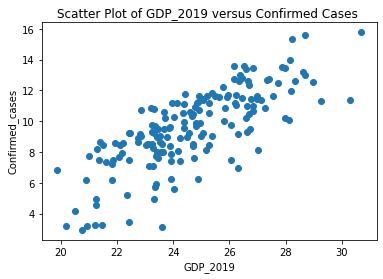

In [74]:
x =np.log(independent_3)
y = np.log(dependent)
plt.plot(x, y, 'o');
plt.xlabel('GDP_2019')
plt.ylabel('Confirmed_cases')
plt.title('Scatter Plot of GDP_2019 versus Confirmed Cases ');


This  still shows that countries with high gdp experienced high covid case than countries with low gdp

In [80]:
#Multiplelinear regression
results = smf.ols("dependent ~ independent_2 +independent_3 ", data=exam).fit()
results.params

Intercept        1.065836e+05
independent_2   -1.848476e+00
independent_3    2.483477e-07
dtype: float64

leaving otherfactors constant countries with high socio economic actvities or socioeconomy experienced higfher covid cases than the ones with the low ones
The slope has nowreduced because one the variables added(independent_3) is nonlinear,therefore the thereis a non_linear relationship